# Top Player: Arrest Details

* Pulling crime details for each player with 2 or greater arrests

In [1]:
# import dependencies
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from pprint import pprint

In [2]:
# call API and loop through players. Append arrest_details with pulled data.
api = "http://nflarrest.com/api/v1/player/arrests/"

players = ['Kenny%20Britt', 'Aldon%20Smith', 'Fred%20Davis', 'Leroy%20Hill', 'Adam%20Jones', 'Johnny%20Jolly', 
           'Albert%20Haynesworth', 'Ray%20McDonald', 'John%20Gill', 'Willie%20Andrews', 'Jason%20Peters', 'Matt%20Prater', 
           'Andrew%20Jackson', 'Eric%20Wright', 'Jerome%20Simpson', 'Rey%20Maualuga', 'Matt%20Jones', 'Dante%20Fowler', 
          'Reuben%20Foster', 'Ronaldo%20McClain', 'William%20Moore', 'Aqib%20Talib', 'Brandon%20Walker', 'Gerald%20Sensabaugh', 
          'Nick%20Fairley', 'Von%20Miller', 'Josh%20Brown', 'Marcell%20Dareus', 'Trevone%20Boykin', 'Aaron%20Berry', 
          'Chris%20Cook', 'Cedric%20Benson', 'Marshawn%20Lynch', 'Letroy%20Guion', 'Brandon%20Underwood', 'Mikel%20Leshoure',
          'Jeff%20Reed', 'Tre%20Mason', 'Dwayne%20Jarrett', 'Cody%20Grimm', 'Larry%20Johnson', 'Justin%20Blackmon', 
          'Erin%20Henderson', 'Joseph%20Randle', 'Brandon%20Marshall', 'Evan%20Rodriguez', 'Adrian%20Peterson', 
          'Vincent%20Jackson', 'Nigel%20Bradham', 'Kenny%20Wright', 'Everson%20Griffen']

start = "?start_date=2008-01-01"

player_arrest_details = []

for player in players:
    player_url = api + player + start
    response = requests.get(player_url)
    player_json = response.json()
    player_arrest_details.append(player_json)


In [3]:
# flatten list of lists into one list
flat_list = [item for sublist in player_arrest_details for item in sublist]

In [4]:
#create dataframe
player_arrest_details_df = pd.DataFrame(flat_list)

In [5]:
# clean dataframe
player_arrest_details_df = player_arrest_details_df.rename(columns={"Name": "Name", "Date": "Date", "Category": "Category", 
                                                             "Crime_category": "Crime Category", "Description": "Description",
                                                             "Outcome": "Outcome"})
player_arrest_details_df = player_arrest_details_df[["Name", "Date", "Category","Crime Category","Description", "Outcome"]]
player_arrest_details_df.reset_index(drop=True)
player_arrest_details_df.head()

,Name,Date,Category,Crime Category,Description,Outcome
0,Kenny Britt,2012-07-20,DUI,DUI,Charged with drunken driving after trying to p...,"Found not guilty of DUI, guilty of refusing Br..."
1,Kenny Britt,2011-06-29,Outstanding warrant,License / Traffic,Turned himself in on two outstanding warrants ...,Resolution undetermined.
2,Kenny Britt,2011-06-08,Drugs,Drugs,Accused of resisting arrest in New Jersey afte...,Resolution undetermined.
3,Kenny Britt,2011-04-12,Obstruction,Resisting,Accused of eluding police with car chase in hi...,"Pleaded guilty to careless driving, $478 fine."
4,Kenny Britt,2011-02-09,Theft,Theft / Burglary,Accused of theft by deception after allegedly ...,Resolution undetermined.


In [6]:
# save to excel
#player_arrest_details_df.to_excel(f"player_arrest_details.xlsx", index = False)

# Team: Arrest Details

* Pulling crime details for each team

In [7]:
# call API and loop through players. Append arrest_details with pulled data.
api = "http://nflarrest.com/api/v1/team/arrests/"

teams = ['DEN', 'IND', 'TB', 'SF', 'SEA', 'MIN', 'CLE', 'TEN', 'JAC', 'NYJ', 'CIN', 'CHI', 'GB', 'BAL', 'NYG', 'KC', 'PIT', 
         'MIA', 'ATL', 'BUF', 'LA', 'WAS', 'OAK', 'NO', 'PHI', 'DET', 'ARI', 'NE', 'DAL', 'LAC', 'CAR', 'HOU']

start = "?start_date=2008-01-01"

team_arrest_details = []

for team in teams:
    team_url = api + team + start
    response = requests.get(team_url)
    team_json = response.json()
    team_arrest_details.append(team_json)


In [8]:
# flatten list of lists into one list
flat_list1 = [item for sublist in team_arrest_details for item in sublist]

In [9]:
#create dataframe
team_arrest_details_df = pd.DataFrame(flat_list1)

In [10]:
#clean dataframe
team_arrest_details_df = team_arrest_details_df.rename(columns={"Team_preffered_name": "Team Name", "Date": "Date", "Category": "Category", 
                                                             "Crime_category": "Crime Category", "Description": "Description",
                                                             "Outcome": "Outcome", "ArrestSeasonState": "Season State"})
team_arrest_details_df = team_arrest_details_df[["Team Name", "Season State", "Date", "Category", "Crime Category", "Description", "Outcome"]]

team_arrest_details_df.head()

,Team Name,Season State,Date,Category,Crime Category,Description,Outcome
0,Denver Broncos,OffSeason,2018-03-07,Sexual Assault,Sex,Accused of rape in an incident that happened i...,Resolution Undetermined.
1,Denver Broncos,OffSeason,2018-01-14,Drugs,Drugs,"Pulled over for speeding, cops found marijuana...",Resolution Undetermined.
2,Denver Broncos,OffSeason,2017-03-31,Domestic violence,Domestic Violence,Accused of harassment and non-physical domesti...,Resolution Undetermined.
3,Denver Broncos,OffSeason,2016-05-30,Traffic warrant,License / Traffic,Latimer called police and alleged his girlfrie...,Paid $311 to settle ticket.
4,Denver Broncos,OffSeason,2016-02-13,DUI,DUI,"Accused of drunken driving in Ada County, Idah...","Pleaded guilty to misdemeanor, one year probat..."


In [11]:
# save to CSV
#team_arrest_details_df.to_csv(f"team_arrest_details.csv", index = False)

# Graphing the Data

* Arrests by NFL Team
* Crime activity by type
* Crime activity by player

### Graphs in Tableau
* Arrests inseason vs offseason
* Player arrest count & type of crime
* Type of crime that may have led to a trade
* Trades by player that may have been caused by criminal activity

## NFL Team Arrest Activity

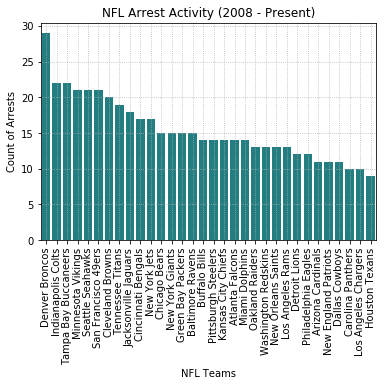

In [44]:
# develop dataframe to plot overall NFL Crime type/count
team_crime_count = team_arrest_details_df.groupby(['Team Name']).count()
team_crime_count = team_crime_count['Crime Category']
team_crime_count = pd.DataFrame(team_crime_count)
team_crime_count = team_crime_count.rename(columns={'Crime Category':'Count'})

team_crime_count.sort_values(by='Count', ascending=False, inplace=True)
team_crime_count = team_crime_count.reset_index(inplace=False)

# plot the total crime activity from 2008 in the NFL
sns.barplot(x=team_crime_count['Team Name'], y=team_crime_count["Count"], color='#138D91')
plt.title("NFL Arrest Activity (2008 - Present)")
plt.ylabel("Count of Arrests")
plt.xlabel("NFL Teams")
plt.xticks(rotation=90)
plt.grid(linestyle='dotted')
plt.savefig("NFL_Arrest_Activity.png")
plt.show()

## Crime Activity by Type

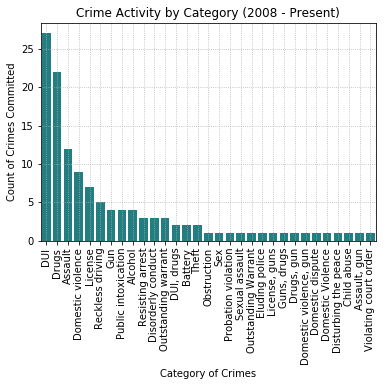

In [45]:
# develop dataframe to plot overall Player Crime type/count
player_crime_type = player_arrest_details_df.groupby('Category').count()
player_crime_type = player_crime_type['Crime Category']
player_crime_type_count = pd.DataFrame(player_crime_type)
player_crime_type_count = player_crime_type_count.rename(columns={'Crime Category':'Count'})

player_crime_type_count.sort_values(by='Count', ascending=False, inplace=True)
player_crime_type_count = player_crime_type_count.reset_index(inplace=False)

# plot the total crime activity by players from 2008 
sns.barplot(x=player_crime_type_count['Category'], y=player_crime_type_count["Count"], color='#138D91')
plt.title("Crime Activity by Category (2008 - Present)")
plt.ylabel("Count of Crimes Committed")
plt.xlabel("Category of Crimes")
plt.xticks(rotation=90)
plt.grid(linestyle='dotted')
plt.savefig("Player_Crime_Type.png")
plt.show()

## Criminal Activity by Player

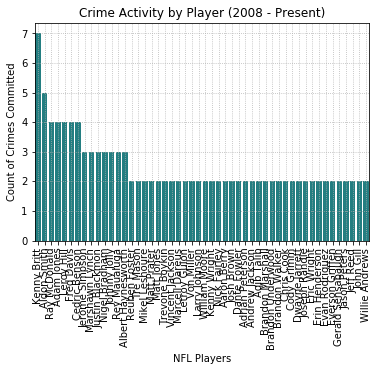

In [46]:
# develop dataframe to plot overall Player Crime type/count
player_crime_count = player_arrest_details_df.groupby('Name').count()
player_crime_count = player_crime_count['Crime Category']
player_crime_count = pd.DataFrame(player_crime_count)
player_crime_count = player_crime_count.rename(columns={'Crime Category':'Count'})

player_crime_count.sort_values(by='Count', ascending=False, inplace=True)
player_crime_count = player_crime_count.reset_index(inplace=False)

# plot the total crime activity by players from 2008 
sns.barplot(x=player_crime_count['Name'], y=player_crime_count["Count"], color='#138D91')
plt.title("Crime Activity by Player (2008 - Present)")
plt.ylabel("Count of Crimes Committed")
plt.xlabel("NFL Players")
plt.xticks(rotation=90)
plt.grid(linestyle='dotted')
plt.savefig("Player_Crime_Count.png")
plt.show()